In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib

In [4]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/fukai/OneDrive/Documents/insurance-database-project/data/insurance.csv')

# Display the first few rows
print(df.head())

# Check the data types
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [6]:
df.drop(columns=['id'], inplace=True, errors='ignore')

In [7]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['charges'])  # All features except target
y = df['charges']  # Target variable (insurance cost)

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (1070, 8), Testing set size: (268, 8)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 33596915.85136147
R-squared Value: 0.7835929767120723


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared Value: {r2_rf}")

Random Forest Mean Squared Error: 20942520.922619622
Random Forest R-squared Value: 0.8651034329144947


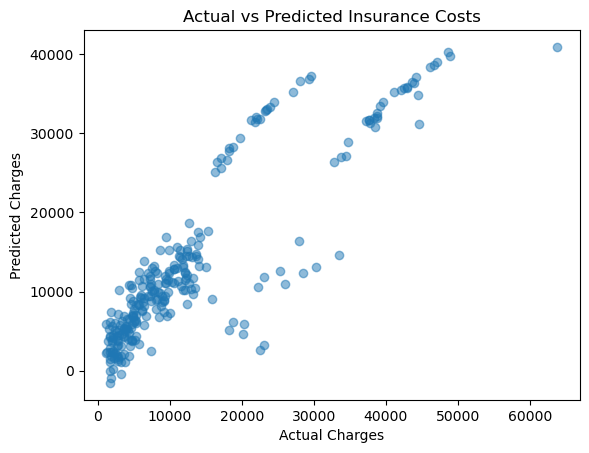

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Costs")
plt.show()

In [11]:
import joblib

joblib.dump(rf_model, 'C:/Users/fukai/OneDrive/Documents/insurance-database-project/models/insurance_cost_predictor.pkl')

print("Model saved successfully.")

Model saved successfully.


In [12]:
loaded_model = joblib.load('C:/Users/fukai/OneDrive/Documents/insurance-database-project/models/insurance_cost_predictor.pkl')
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(sample_data)

print(f"Predicted insurance cost: {prediction[0]}")

Predicted insurance cost: 9630.262601399998


C:\Users\fukai\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [13]:
sample_data = pd.DataFrame([X_test.iloc[0].values], columns=X_test.columns)
prediction = loaded_model.predict(sample_data)
print(f"Predicted insurance cost: {prediction[0]}")

Predicted insurance cost: 9630.262601399998
